## Linear Model Graded Assigment

#### Summary Problem Statement
Boombikes aspires to understand the demand for Shared Bikes by understanding the factors \
on which the demand for the Shared bikes depends. \
    - Which variables are significant in predicting the demand for shared bikes \
    - How well those variables describe the bike demands

#### Business Goal:
    - Come up with a model based on the available independent variables
    - This model will be used by the managment to understand how the demands vary with different features
    - Model will be a good way for the management to understand the demand dynamics
    

In [1]:
## import necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import the sci kit learn and the stats model libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#### Exploratory data analysis 
    - Read the data and describe the variables
    - Modification of the variables like weathersit and season to Categorical Variables.

In [2]:
## Step 1: read the data 
bikesDataframe = pd.read_csv('day.csv')

bikesDataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## cehcking the info and the describe functions
bikesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikesDataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### DROPPING OF THE COLUMNS WITH REDUNDANCIES
 ##### - The column "cnt" is the summation of the "casual" and "regsitered" columns. Hence dropping the two columns from the dataset
 ##### - The "dteday" column information is communicated via the "yr" , "month", "holiday" and "Weekday" columns. Hence removing the "dteday" column.
 ##### - The "instant" column just contains the serial number which will not be useful for model creation. Hence dropping that column also.

In [5]:
bikesDataframe = bikesDataframe.drop('casual', axis=1)
bikesDataframe = bikesDataframe.drop('registered', axis=1)
bikesDataframe = bikesDataframe.drop('dteday', axis=1)
bikesDataframe = bikesDataframe.drop('instant', axis=1)
bikesDataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## STARTING OF THE EDA 

In [6]:
## Converting to the columns with meaning into Categorical data type
bikesDataframe['season'] = bikesDataframe['season'].astype('category')
bikesDataframe['weathersit'] = bikesDataframe['weathersit'].astype('category')
bikesDataframe['mnth'] = bikesDataframe['mnth'].astype('category')
bikesDataframe['weekday'] = bikesDataframe['weekday'].astype('category')

<Axes: xlabel='weathersit', ylabel='cnt'>

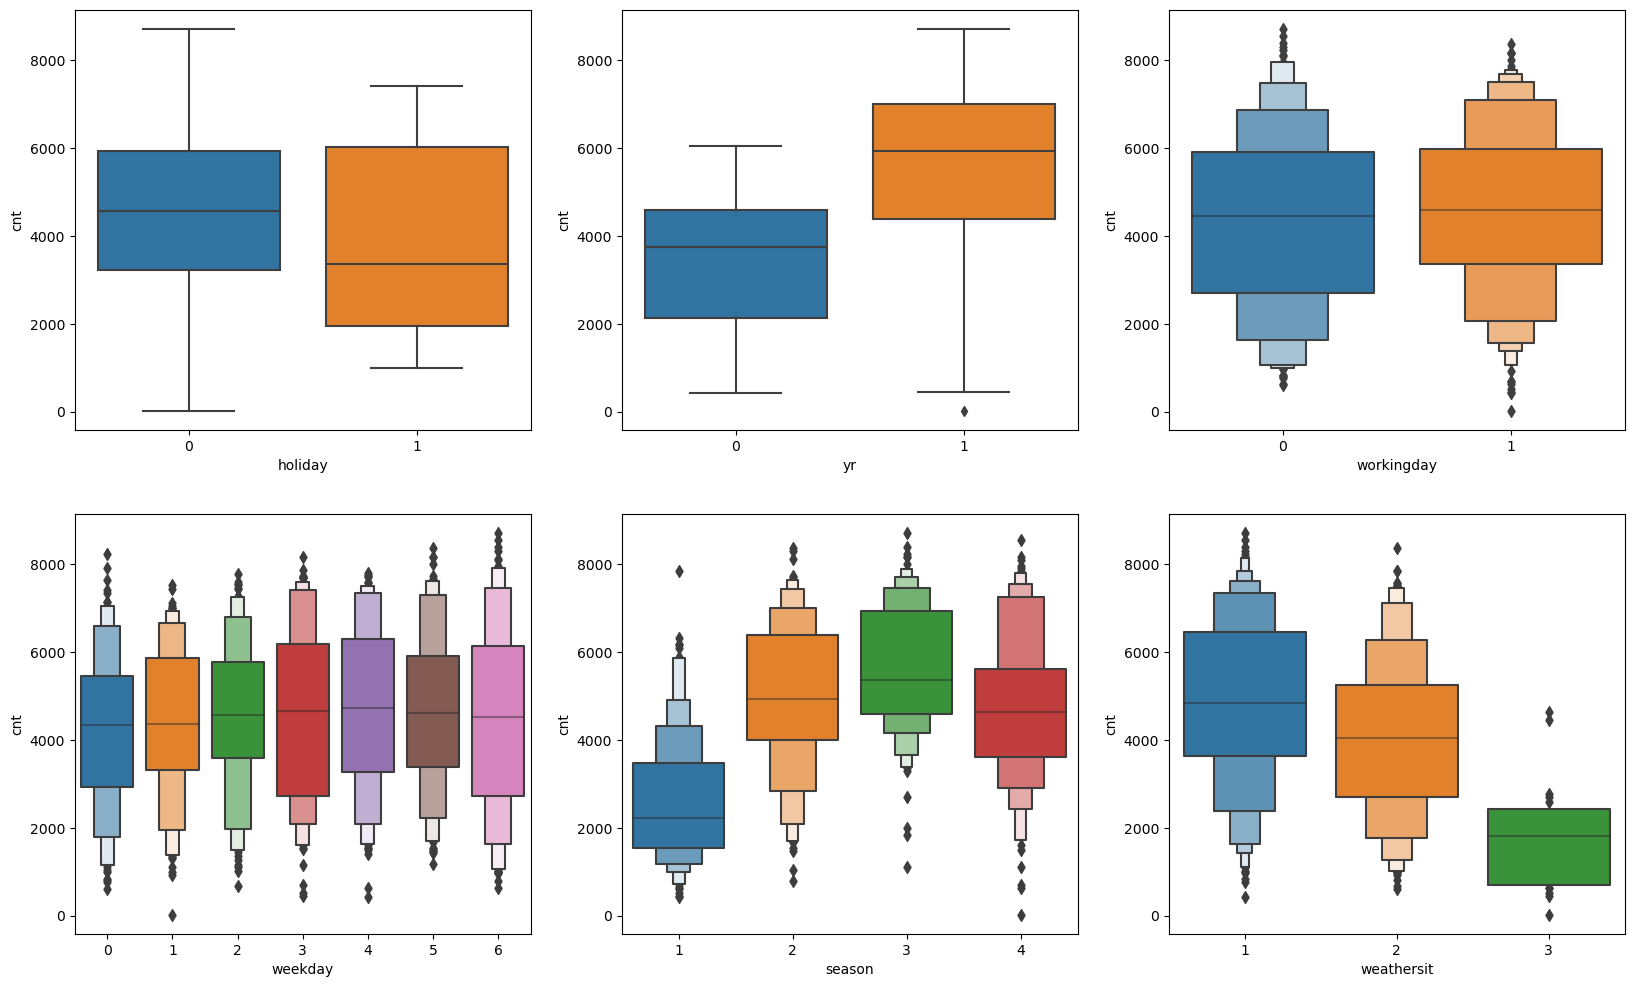

In [7]:
## EDA for the various categorical variable

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='holiday', y='cnt', data=bikesDataframe)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=bikesDataframe)
plt.subplot(2,3,3)
sns.boxenplot(x='workingday', y='cnt', data=bikesDataframe)
plt.subplot(2,3,4)
sns.boxenplot(x='weekday', y='cnt', data=bikesDataframe)
plt.subplot(2,3,5)
sns.boxenplot(x='season', y='cnt', data=bikesDataframe)
plt.subplot(2,3,6)
sns.boxenplot(x='weathersit', y='cnt', data=bikesDataframe)

#### From the above EDA we can see the following patterns
        - The CNT median value increases signifcantly when its not a Holiday.
        - The CNT median value increases in the Summer and Fall season.
        - The CNT median value increases when there is clear weather, mist  weather situation as compared
          to the light snow / heavy rain scenario.
        - The CNT median value doesnt show too much deviation based on the weekday category variable. 

In [8]:
## The Season column is a categorical variable. Converting it to categorical based on the get_dummies function
dummy_season = pd.get_dummies(bikesDataframe['season'], prefix='season',drop_first=True)
bikesDataframe = pd.concat([bikesDataframe, dummy_season], axis=1)
bikesDataframe = bikesDataframe.drop('season', axis=1)

bikesDataframe.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,False,False,False
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,False,False,False
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False


In [9]:
## The Weathersit column is also a categorical variable. Converting it to Categorical based on the get_dummies function
dummy_weathersit = pd.get_dummies(bikesDataframe['weathersit'], prefix='weathersit', drop_first=True)
bikesDataframe = pd.concat([bikesDataframe, dummy_weathersit], axis=1)
bikesDataframe = bikesDataframe.drop('weathersit', axis=1)

bikesDataframe.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,True,False
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,True,False
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,False,False


In [10]:
## The Month column is also a categorical variable. Converting it to Categorical based on the get_dummies function
dummy_mnth = pd.get_dummies(bikesDataframe['mnth'], prefix='mnth', drop_first=True)
bikesDataframe = pd.concat([bikesDataframe, dummy_mnth], axis=1)
bikesDataframe = bikesDataframe.drop('mnth', axis=1)

bikesDataframe.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
## The Weekday column is also a categorical variable. Converting it to Categorical based on the get_dummies function
dummy_weekday = pd.get_dummies(bikesDataframe['weekday'], prefix='weekday', drop_first=True)
bikesDataframe = pd.concat([bikesDataframe, dummy_weekday], axis=1)
bikesDataframe = bikesDataframe.drop('weekday', axis=1)

bikesDataframe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,False,False,True,False,False,False


In [12]:
## Converting the True / False to numberical values
newList =['season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_9', \
          'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',\
         'mnth_6', 'mnth_7', 'mnth_8', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'\
         , 'weekday_6', 'weekday_1']
bikesDataframe[newList] = bikesDataframe[newList].apply(lambda x: x.map({False: 0, True: 1}))
bikesDataframe.head()
bikesDataframe.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [13]:
bikesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    int64  
 9   season_3      730 non-null    int64  
 10  season_4      730 non-null    int64  
 11  weathersit_2  730 non-null    int64  
 12  weathersit_3  730 non-null    int64  
 13  mnth_2        730 non-null    int64  
 14  mnth_3        730 non-null    int64  
 15  mnth_4        730 non-null    int64  
 16  mnth_5        730 non-null    int64  
 17  mnth_6        730 non-null    int64  
 18  mnth_7        730 non-null    

<Axes: >

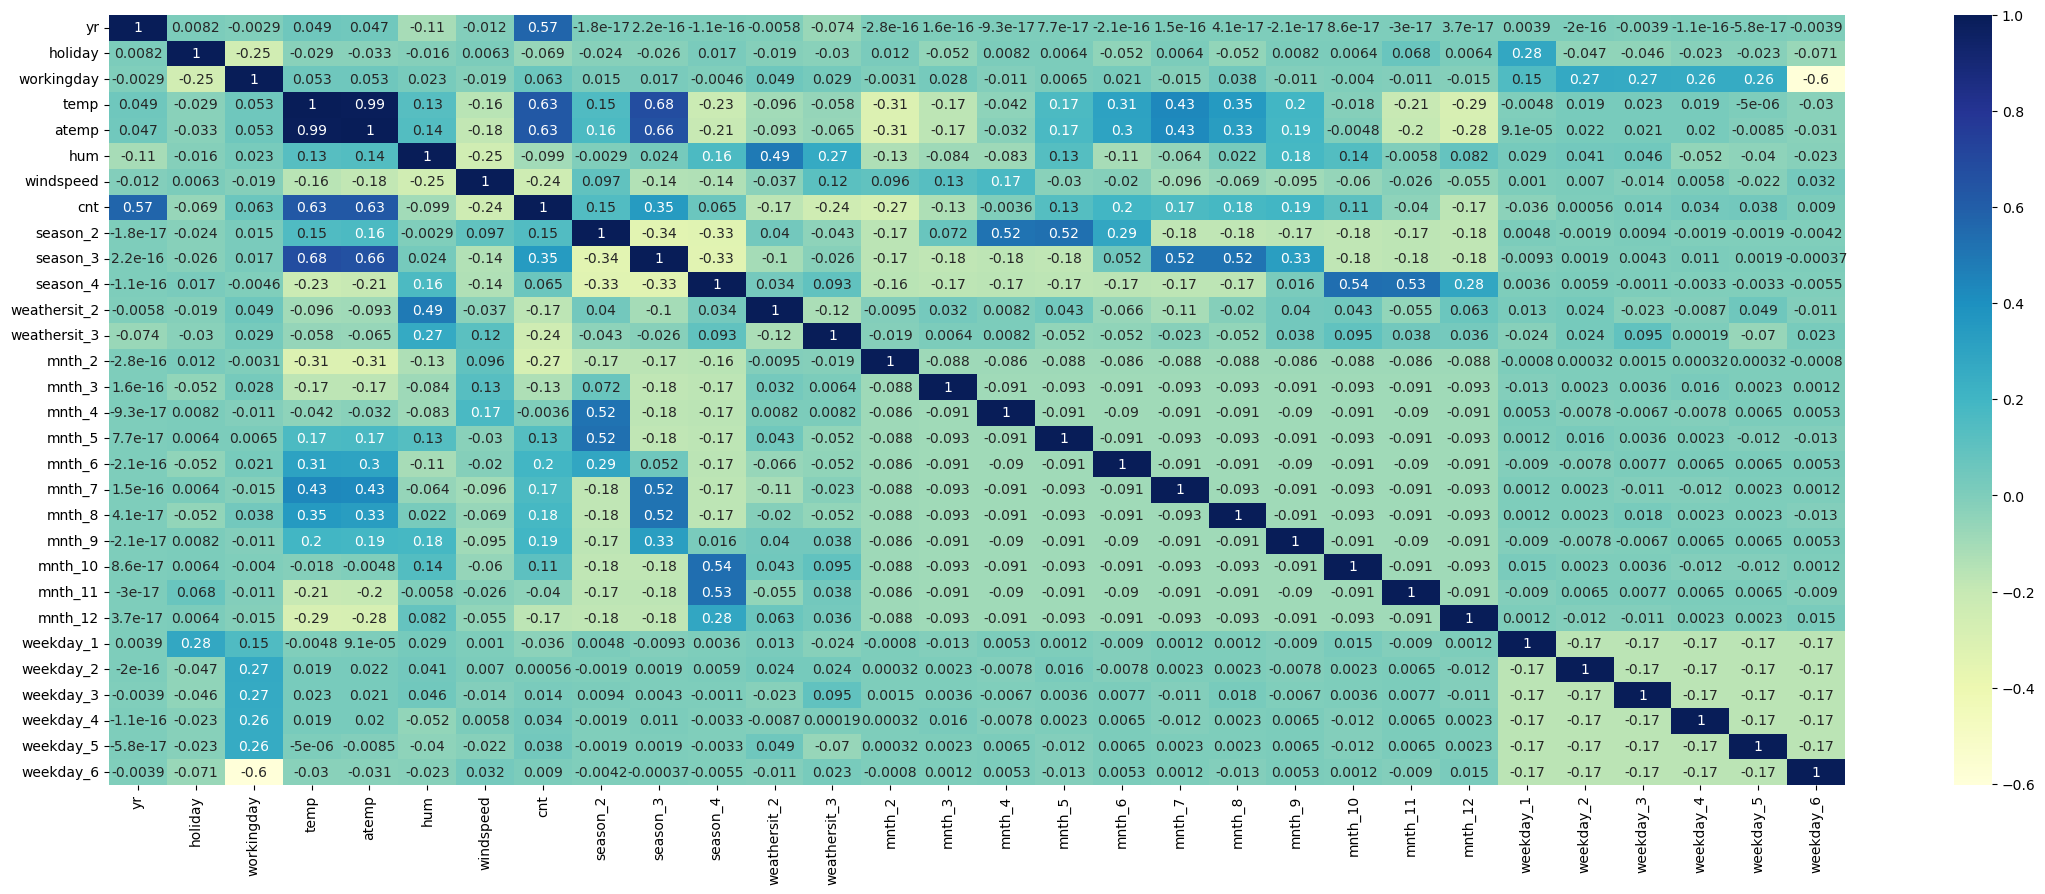

In [14]:
## Heatmap the training data set
plt.figure(figsize=(28,10))
sns.heatmap(bikesDataframe.corr(), annot = True, cmap='YlGnBu')

#### From the above correlation heat map, the variables 'temp' and 'atemp' are highly correlated. Hence dropping the 'atemp' column from the dataset. 

<Axes: >

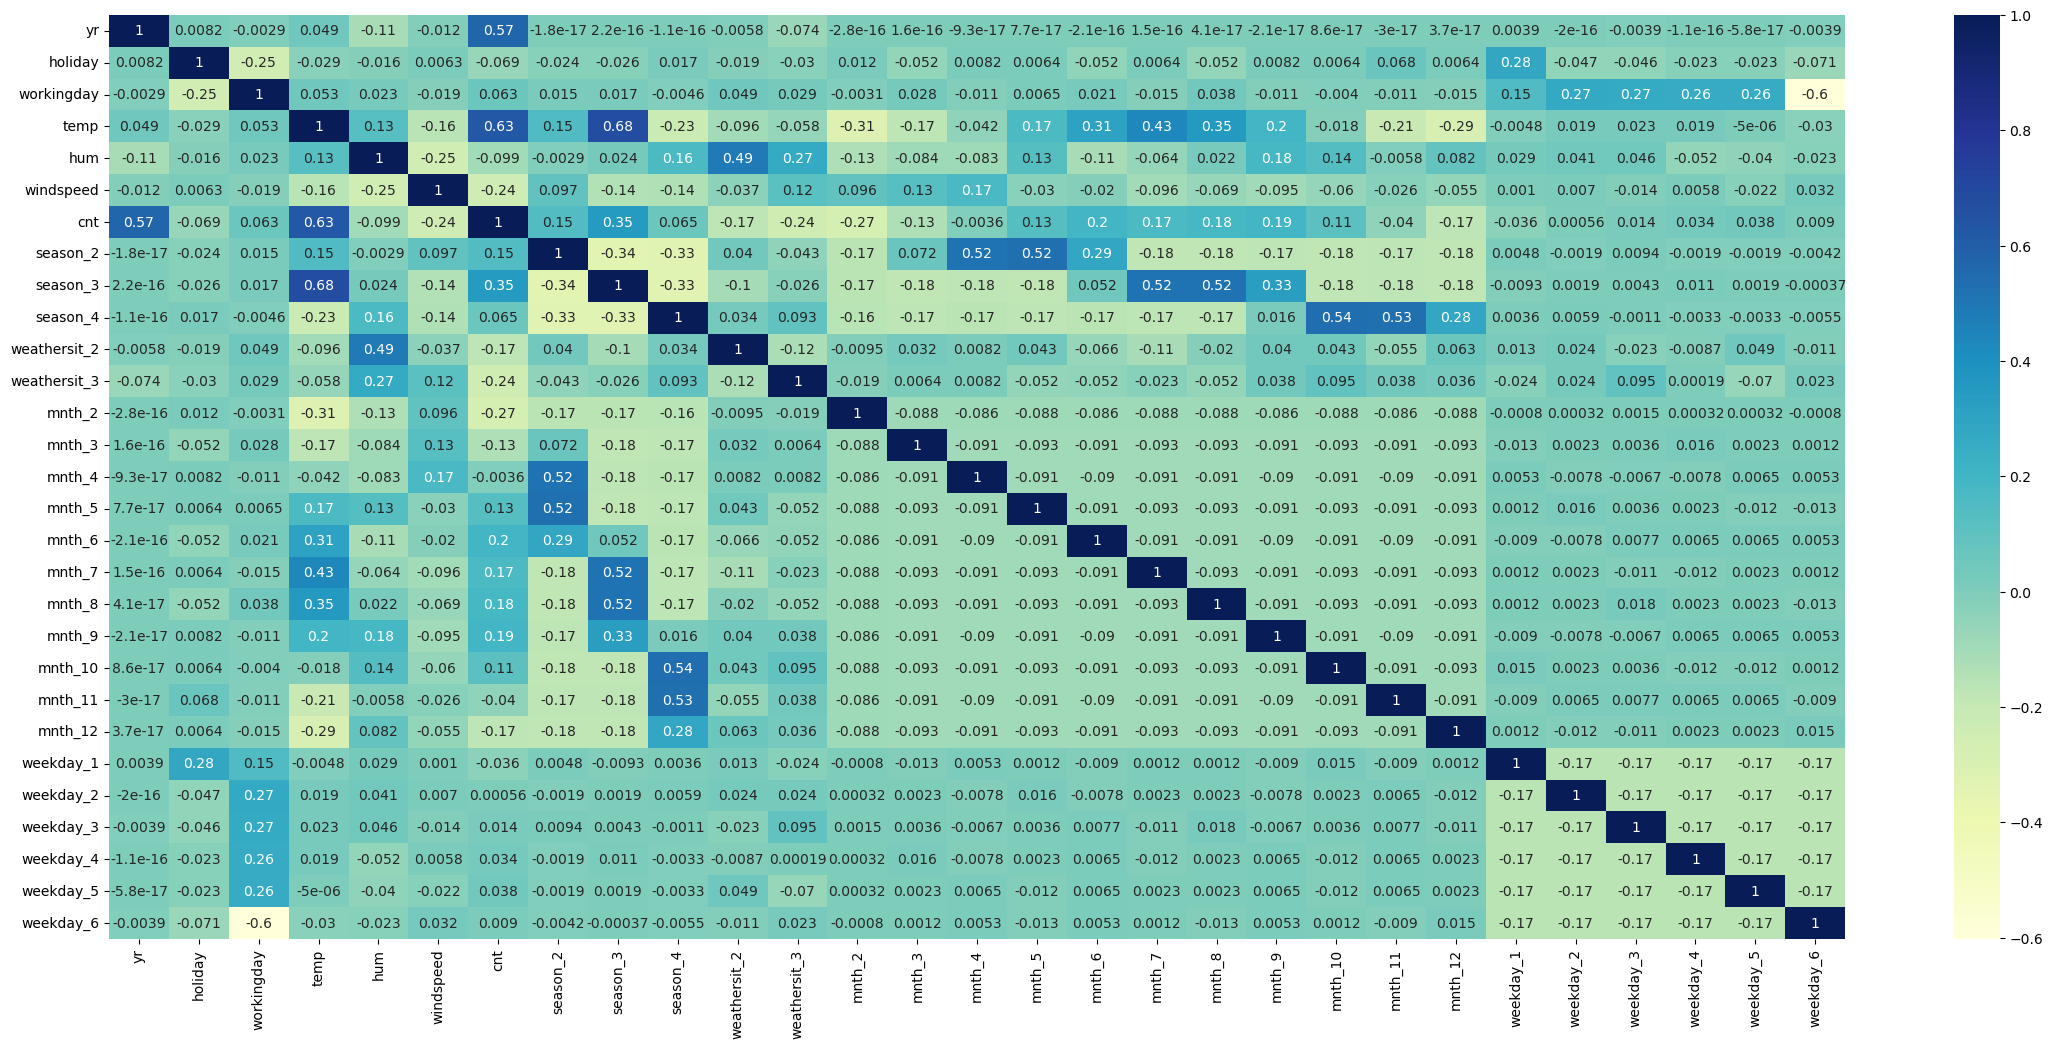

In [15]:
bikesDataframe = bikesDataframe.drop('atemp', axis=1)
## After dropping the atemp column, checking the heatmap again for the data set
plt.figure(figsize=(28,12))
sns.heatmap(bikesDataframe.corr(), annot = True, cmap='YlGnBu')

## Using Pair Plots to heck the numerical variables w.r.t Cnt 

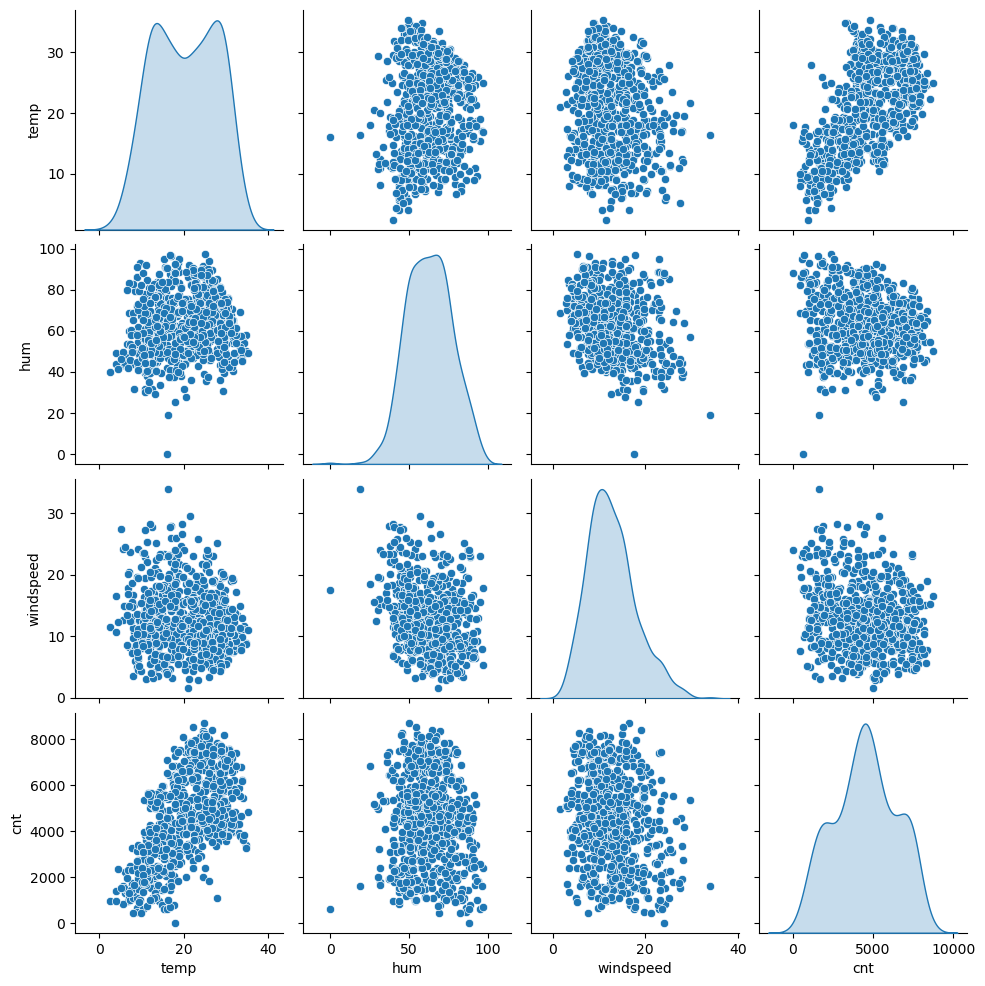

In [16]:
bikesDataframe_num = bikesDataframe[['temp','hum', 'windspeed','cnt']]
sns.pairplot(bikesDataframe_num, diag_kind='kde')
plt.show()

# Starting the Linear model creation
## Splitting the dataframe into Test and Train data sets

In [17]:
df_train, df_test = train_test_split(bikesDataframe, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Rescaling of the data with the help of MinMaxScaler()

In [18]:
# initialize an min max scaler object
scaler = MinMaxScaler()
# Create the list of numeric vars
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Dividing the trainset into X and Y sets for model building

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   cnt           510 non-null    float64
 7   season_2      510 non-null    int64  
 8   season_3      510 non-null    int64  
 9   season_4      510 non-null    int64  
 10  weathersit_2  510 non-null    int64  
 11  weathersit_3  510 non-null    int64  
 12  mnth_2        510 non-null    int64  
 13  mnth_3        510 non-null    int64  
 14  mnth_4        510 non-null    int64  
 15  mnth_5        510 non-null    int64  
 16  mnth_6        510 non-null    int64  
 17  mnth_7        510 non-null    int64  
 18  mnth_8        510 non-null    int

In [20]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,weathersit_2,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## RFE 
##### Recursive Feature Elimination method
##### RFE is a method that recursively removes the least important features from the model until the desired number of features is reached. It works by fitting the model multiple times and ranking the features based on their importance.

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 12),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'weathersit_3', 'mnth_9', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['season_3', 'weathersit_2', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_6'],
      dtype='object')

## Building models using the statsmodel, for detailed stats

### Model 1

In [26]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [27]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          4.91e-181
Time:                        23:29:46   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

In [28]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'weathersit_3', 'mnth_9', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [29]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_train_new.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,weathersit_3,mnth_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


## Model 2
#### From the above stats model output, we see that the P value of weekday_5 is high. Removing it and recreating the model

In [30]:
X_train_new1 = X_train_rfe.drop(['weekday_5'], axis=1)
X_train_new1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'weathersit_3', 'mnth_9', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')

In [31]:
## Doing the training again
X_train_rfe1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train, X_train_rfe1).fit()

In [32]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          4.91e-181
Time:                        23:29:46   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.543   

## Model 3
#### From the above output of various features, the P value of 'weekday_3' is high. Dropping it.

In [33]:
X_train_new2 = X_train_rfe1.drop(['weekday_3'], axis=1)
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'weathersit_3', 'mnth_9', 'weekday_1',
       'weekday_2', 'weekday_4'],
      dtype='object')

In [34]:
## Doing the training again
X_train_rfe2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          3.52e-182
Time:                        23:29:46   Log-Likelihood:                 492.90
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     496   BIC:                            -898.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2573      0.027      9.555   

## Model 4
#### Dropping the variable 'weekday_4' as the P value is high

In [35]:
X_train_new3 = X_train_rfe2.drop(['weekday_4'], axis=1)
X_train_new3.columns
## Doing the training again
X_train_rfe3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train, X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.48e-183
Time:                        23:29:46   Log-Likelihood:                 492.87
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2570      0.027      9.561   

#### VIF CHECK

In [36]:
vif = pd.DataFrame()
X1 = X_train_new3
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,42.38
3,workingday,1.27
5,hum,1.25
8,season_4,1.25
11,weekday_1,1.24
2,holiday,1.21
4,temp,1.21
7,season_2,1.19
6,windspeed,1.16
12,weekday_2,1.15


## Model 5
#### Dropping the variable 'weekday_2' as the P value is high

In [37]:
X_train_new4 = X_train_rfe3.drop(['weekday_2'], axis=1)
X_train_new4.columns
## Doing the training again
X_train_rfe4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train, X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.48e-184
Time:                        23:29:46   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     498   BIC:                            -910.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.601   

#### VIF CHECK

In [38]:
vif = pd.DataFrame()
X1 = X_train_new4
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,42.33
5,hum,1.25
8,season_4,1.25
4,temp,1.21
2,holiday,1.20
7,season_2,1.19
11,weekday_1,1.17
6,windspeed,1.16
3,workingday,1.14
9,weathersit_3,1.11


## Model 6
#### Dropping the variable 'weekday_1' as the P value is high

In [39]:
X_train_new5 = X_train_rfe4.drop(['weekday_1'], axis=1)
X_train_new5.columns
## Doing the training again
X_train_rfe5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train, X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.19e-185
Time:                        23:29:46   Log-Likelihood:                 492.07
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2585      0.027      9.632   

#### VIF CHECK

In [40]:
vif = pd.DataFrame()
X1 = X_train_new5
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,42.29
5,hum,1.25
8,season_4,1.25
4,temp,1.21
7,season_2,1.19
6,windspeed,1.16
9,weathersit_3,1.11
10,mnth_9,1.11
2,holiday,1.07
3,workingday,1.07


## Model 7
#### Removing the workingday variable as the P value for the same is on the higher side.

In [41]:
X_train_new6 = X_train_rfe5.drop(['workingday'], axis=1)
X_train_new6.columns
## Doing the training again
X_train_rfe6 = sm.add_constant(X_train_new6)
lm6 = sm.OLS(y_train, X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          4.74e-186
Time:                        23:29:46   Log-Likelihood:                 490.74
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.234   

#### VIF CHECK

In [42]:
vif = pd.DataFrame()
X1 = X_train_new6
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,40.19
4,hum,1.25
7,season_4,1.24
3,temp,1.21
6,season_2,1.19
5,windspeed,1.16
8,weathersit_3,1.11
9,mnth_9,1.11
1,yr,1.02
2,holiday,1.01


#### Removing the const column from the above dataframe 

In [43]:
X_train_new6.head()
X_train_new6.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'weathersit_3', 'mnth_9'],
      dtype='object')

## Residual Anaylsis

In [44]:
y_train_pred = lm6.predict(X_train_new6)

<Axes: ylabel='Density'>

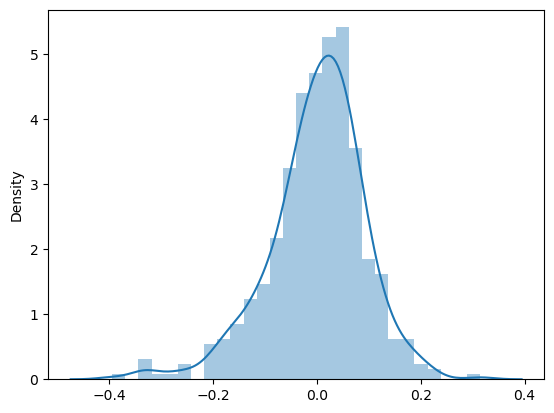

In [45]:
res = y_train - y_train_pred
sns.distplot(res)

From the above histogram we can see that the residual parameters are normally distributed. 

## PREDICTING 

In [46]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

## Removing the not required columns from the test data frame

In [50]:
X_test_sm = X_test_sm.drop(['workingday', 'season_3', 'weathersit_2', 'mnth_2', 'mnth_3', 'mnth_4', \
                            'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',\
                            'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'], axis=1)
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,weathersit_3,mnth_9
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0


In [51]:
y_test_pred = lm6.predict(X_test_sm)

In [52]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8036002511614431

# Analysis of Parameters affecting Bike Bookings

#### The parameters which are positively affecting the Bike Bookings are 
        - Temperature
        - Year
        - Summer Season  

#### The parameters which are negatively influencing the Bike bookings are
        - Holidays
        - Windspeed
        - When the weather is for Thunderstorms, Scattered clouds, Light snow
        - Humidity 